In [4]:
import os
import numpy as np
import pandas as pd
import cv2 as cv

In [2]:
from skimage.io import imshow, imread, imsave
import dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('../01_dataset_GENKI_4K/model/shape_predictor_68_face_landmarks.dat')

In [70]:

def find_pts(img_path, verbose=0, is_show=False , is_tag=False, is_normalize=False):
#     img = imread(pd_face.iloc[9]['path'])
    img = imread(img_path)
    pts = []
    
    dets = detector(img, 1)
    if verbose > 0:
        print(f'image shape: {str(img.shape)}')
        print('Number of faces detected: {}'.format(len(dets)))
    for i, face in enumerate(dets):
        if verbose > 0:
            print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} ".format(
                i, face.left(), face.top(), face.right(), face.bottom()))
            print(f"aspect_ratio:{(face.bottom() - face.top()) / (face.right() -  face.left())}")
#         if is_tag:
#             img = cv.rectangle(img.copy(), (face.left(), face.top()), (face.right(), face.bottom()), (255, 0, 0), 1)

        shape = predictor(img, face)
        face_width = face.right() - face.left()
        face_height = face.bottom() - face.top()

        for i in range(68):
            if i < 36:
                continue
            if is_tag:
                img = cv.circle(img.copy(), (shape.part(i).x, shape.part(i).y), 1, (0,0,255), 1)
                cv.putText(img,str(i), (shape.part(i).x,shape.part(i).y), cv.FONT_HERSHEY_COMPLEX, 0.25, (0,255,0), 1)
            x = shape.part(i).x
            y = shape.part(i).y
            if is_normalize:
                # Should be changed because the total image should base on face, not origin pic
                x = (shape.part(i).x - face.left()) / face_width
                y = (shape.part(i).y - face.top()) / face_height
#             pts.append([x, y])
            pts.extend([x, y])
        break
        
    if is_show:
        imshow(img)
    
    return pts

image shape: (192, 180, 3)
Number of faces detected: 1
Detection 0: Left: 46 Top: 66 Right: 135 Bottom: 156 
aspect_ratio:1.0112359550561798


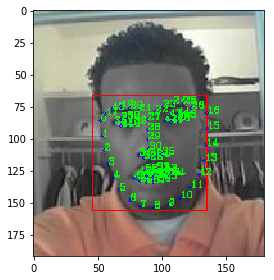

In [51]:
img_path_root = './faces'
img_paths = []
for root, dirs, files in os.walk(img_path_root):
    for file in files:
        img_paths.append(os.path.join(root, file)) 
        
result = find_pts(img_paths[0], is_show=True, is_tag=True, verbose=1, is_normalize=True)

image shape: (192, 180, 3)
Number of faces detected: 1
Detection 0: Left: 44 Top: 32 Right: 151 Bottom: 140 
aspect_ratio:1.0093457943925233


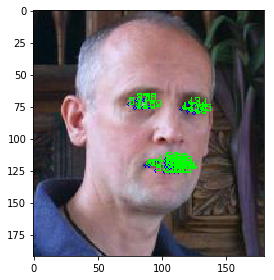

In [101]:
result = find_pts(img_paths[13], is_show=True, is_tag=True, verbose=1, is_normalize=True)

In [99]:
def draw_result(img_path, model, verbose=0, is_show=True , is_tag=False, is_normalize=True):
#     img = imread(pd_face.iloc[9]['path'])
    img = imread(img_path)
    pts = []
    
    dets = detector(img, 1)
    if verbose > 0:
        print(f'image shape: {str(img.shape)}')
        print('Number of faces detected: {}'.format(len(dets)))
    for i, face in enumerate(dets):
        if verbose > 0:
            print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} ".format(
                i, face.left(), face.top(), face.right(), face.bottom()))
            print(f"aspect_ratio:{(face.bottom() - face.top()) / (face.right() -  face.left())}")
        if is_show:
            img = cv.rectangle(img.copy(), (face.left(), face.top()), (face.right(), face.bottom()), (255, 0, 0), 1)

        shape = predictor(img, face)
        face_width = face.right() - face.left()
        face_height = face.bottom() - face.top()

        for i in range(68):
            if i < 36:
                continue
            if is_tag:
                img = cv.circle(img.copy(), (shape.part(i).x, shape.part(i).y), 1, (0,0,255), 1)
                cv.putText(img,str(i), (shape.part(i).x,shape.part(i).y), cv.FONT_HERSHEY_COMPLEX, 0.25, (0,255,0), 1)
            x = shape.part(i).x
            y = shape.part(i).y
            if is_normalize:
                # Should be changed because the total image should base on face, not origin pic
                x = (shape.part(i).x - face.left()) / face_width
                y = (shape.part(i).y - face.top()) / face_height
#             pts.append([x, y])
            pts.extend([x, y])
        break
    
    pts = np.array(pts).reshape(1, -1)
    
    prediction = model.predict(pts)
    is_smile = True if prediction > 0 else False
    cv.putText(img, 
               'smile' if is_smile else 'not smile',  
               (face.left(), face.top() - 5),
               cv.FONT_HERSHEY_PLAIN, 
               1, 
               (0,0,255))
        
    if is_show:
        imshow(img)
    
    return 0

0

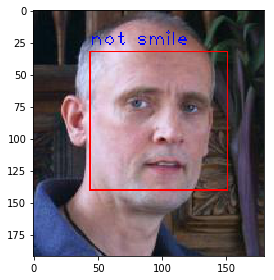

In [100]:
draw_result(img_paths[13], svm_model)

In [ ]:
# from skimage.util import montage as montage
# import random

# def normalize_img(filename, is_grey=True, is_vectorize=False, width=96, height=90):
#     size = WIDTH, HEIGHT # (width, height)
#     if isinstance(filename, str):
#         im = Image.open(filename)
#     else:
#         im = Image.fromarray(filename)
#     resized_im = im.resize(size, Image.ANTIALIAS) # resize image
#     result = np.array(resized_im)
#     if is_grey:
#         im_grey = resized_im.convert('L') # convert the image to *greyscale*
#         im_array = np.array(im_grey) # convert to np array
#         result = im_array
#     if is_vectorize:
#         oned_array = result.reshape(size[0] * size[1])
#         result = oned_array
#     return result#np.array(resized_im)#oned_array

# montage_rgb = lambda x: np.stack([montage(x[:, :, :, i]) for i in range(x.shape[3])], -1)
# def get_result_montage():
#     draws = []
#     for i in range(4):
#         rand_num = random.randrange(1, 2000)
#         img = get_result_img(rand_num)
#         _, draw = find_pts_for_show(img, is_show=False, is_rect=True)
#         draws.append(draw)
#     return montage(np.array(draws))
# img_result_montage = get_result_montage()
# imshow(img_result_montage)



In [69]:
def gen_train_data():
    
    img_path_root = './faces'
    img_paths = []
    feature_pts = []
    for root, dirs, files in os.walk(img_path_root):
        for file in files:
#             img_paths.append(os.path.join(root, file))
            data_list = [file[4:8]]
            data_list.extend(find_pts(os.path.join(root, file), is_normalize=True))

            feature_pts.append(data_list)

    feature_pts = sorted(feature_pts, key=lambda x: x[0], reverse=False)
    train_x = pd.DataFrame(feature_pts, columns=list(range(len(feature_pts[0]))))
    return train_x

In [70]:
train_x = gen_train_data()

In [108]:
# train_x.set_index(0, inplace=True)
# train_x.reset_index(inplace=True)
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0001,0.044944,0.288889,0.067416,0.411111,0.078652,0.533333,0.112360,0.655556,0.168539,...,0.595506,0.611111,0.741573,0.611111,0.595506,0.688889,0.528090,0.688889,0.471910,0.688889
1,0002,0.067568,0.346667,0.094595,0.466667,0.108108,0.573333,0.135135,0.693333,0.175676,...,0.567568,0.666667,0.675676,0.680000,0.567568,0.746667,0.513514,0.746667,0.459459,0.746667
2,0003,0.027778,0.222222,0.027778,0.333333,0.027778,0.444444,0.027778,0.583333,0.083333,...,0.527778,0.666667,0.638889,0.666667,0.527778,0.722222,0.472222,0.722222,0.416667,0.722222
3,0004,0.053333,0.240000,0.053333,0.386667,0.053333,0.533333,0.053333,0.666667,0.080000,...,0.560000,0.760000,0.653333,0.786667,0.560000,0.840000,0.493333,0.840000,0.440000,0.826667
4,0005,-0.040541,0.283784,-0.013514,0.405405,0.040541,0.540541,0.067568,0.648649,0.121622,...,0.621622,0.581081,0.729730,0.554054,0.635135,0.675676,0.567568,0.702703,0.486486,0.716216


In [81]:
# train_x.to_csv('./68pts_normed.csv')

In [101]:
labels = pd.read_csv('../01_dataset_GENKI_4K/labels.csv')[['is_smile']]

In [113]:
# dataset = train_x.concat(labels, join='outer')
# dataset = pd.merge(train_x, labels, left_index=True, right_index=True, how='outer')

dataset = pd.merge(train_x, labels, left_index=True, right_index=True)
dataset.set_index(0, inplace=True)
dataset.dropna(inplace=True)

In [120]:
img_df = dataset[dataset.columns.tolist()[:-1]]
label_df = dataset[['is_smile']]

In [121]:
# labels.shape
img_df.shape

(3884, 136)

In [122]:
label_df.shape

(3884, 1)

## Modeling

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib


In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(img_df, label_df, test_size=0.3)

In [10]:
# svm_model = SVC(kernel='sigmoid', degree=3, tol=1e-6, verbose=True).fit(X_train, Y_train)
svm_model = LinearSVC(multi_class='ovr', penalty='l2', tol=1e-6, verbose=1).fit(X_train, Y_train)

accuracy_score(y_true=Y_val, y_pred=svm_model.predict(X_val))

In [128]:
joblib.dump(svm_model, './68pts_svm.joblib')

['../base_classifications/68pts_svm.joblib']

In [5]:
train_x = pd.read_csv('./68pts_normed.csv')
labels = pd.read_csv('../01_dataset_GENKI_4K/data/labels.csv')[['is_smile']]

dataset = pd.merge(train_x, labels, left_index=True, right_index=True)
dataset.set_index('0', inplace=True)
dataset.dropna(inplace=True)

/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


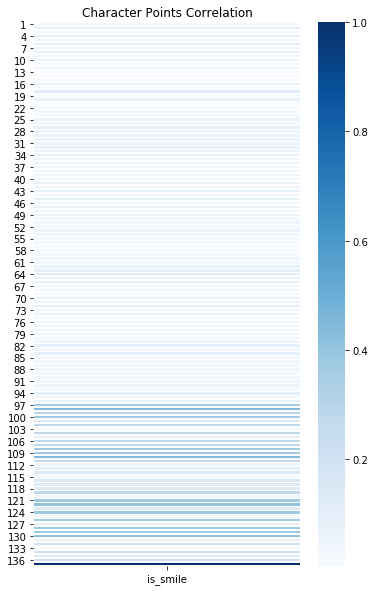

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 10))
cor = dataset.corr()[['is_smile']]
sns.heatmap(np.abs(cor), annot=False, linewidths=.5, fmt= '.2f', cmap=plt.cm.Blues)
plt.title("Character Points Correlation",fontsize=12)

fig.show()

In [7]:
img_df = dataset[dataset.columns.tolist()[72:-1]]
label_df = dataset[['is_smile']]

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(img_df, label_df, test_size=0.3)

svm_model1 = SVC(kernel='sigmoid', degree=3, tol=1e-6, verbose=False).fit(X_train.values, Y_train.values)
svm_model2 = SVC(kernel='linear', degree=3, tol=1e-6, verbose=False).fit(X_train.values, Y_train.values)
svm_model4 = SVC(kernel='poly', degree=3, tol=1e-6, verbose=False).fit(X_train.values, Y_train.values)
svm_model3 = LinearSVC(multi_class='ovr', penalty='l2', tol=1e-6, verbose=0).fit(X_train.values, Y_train.values)
svm_model5 = LinearSVC(multi_class='ovr', penalty='l1', tol=1e-6, verbose=0, dual=False).fit(X_train.values, Y_train.values)
lgc1 = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr', verbose=1).fit(X_train.values, Y_train.values)
lgc2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', verbose=1).fit(X_train.values, Y_train.values)

print(accuracy_score(y_true=Y_val, y_pred=svm_model1.predict(X_val)))
print(accuracy_score(y_true=Y_val, y_pred=svm_model2.predict(X_val)))
print(accuracy_score(y_true=Y_val, y_pred=svm_model4.predict(X_val)))
print(accuracy_score(y_true=Y_val, y_pred=svm_model3.predict(X_val)))
print(accuracy_score(y_true=Y_val, y_pred=svm_model5.predict(X_val)))
print(accuracy_score(y_true=Y_val, y_pred=lgc1.predict(X_val)))
print(accuracy_score(y_true=Y_val, y_pred=lgc2.predict(X_val)))

/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leonling/workspace/pyenv/scientific/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWar

[LibLinear]0.5900514579759862
0.9356775300171527
0.5591766723842195
0.9399656946826758
0.9416809605488851
0.8293825042881647
0.8176672384219554


In [34]:
svm_model = LinearSVC(multi_class='ovr', penalty='l2', tol=1e-6, verbose=1).fit(img_df.values, label_df.values)

[LibLinear]

In [37]:
joblib.dump(svm_model, './32pts_svm.joblib')

['./32pts_svm.joblib']

In [76]:
len(img_df.columns)

64

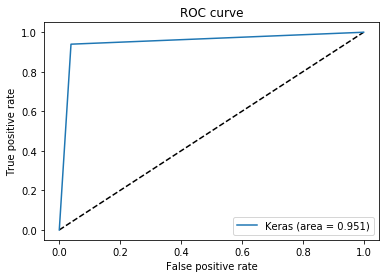

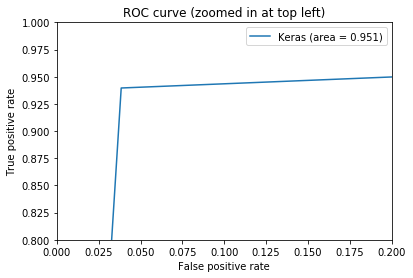

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_keras = svm_model.predict(X_val).ravel()
auc_keras = roc_auc_score(Y_val.values.ravel(), y_pred_keras)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_val.values.ravel(), y_pred_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()